In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Path: greenary.ipynb

In [11]:
# read csv file
greenary_raw = pd.read_csv('./녹지현황_20230530183942.csv', index_col=[0,1], header=1)
# drop first row
greenary_raw = greenary_raw.drop(greenary_raw.index[0])
# drop index with [소계, 중부공원녹지사업소, 안전총괄실]
greenary_raw = greenary_raw.drop(['소계', '중부공원녹지사업소', '안전총괄실'], level=1)
# change index name
greenary_raw.index.names = ['시', '구']

greenary_raw.replace('-', 0, inplace=True)

# get odd columns for area
greenary_area = greenary_raw.iloc[:, 1::2]
greenary_area.columns = greenary_area.columns.str.split('.').str[0]
greenary_area = greenary_area.astype('float64')
# get even columns for count
greenary_count = greenary_raw.iloc[:, ::2]
greenary_count =  greenary_count.astype('float64')

print(greenary_area.head())
print(greenary_count.head())

               합계     시설녹지      일반녹지      분리대      수벽      수림대    하천변조경  \
시   구                                                                     
서울시 종로구  224004.0  53857.0  107486.0   2810.0  6169.0      0.0      0.0   
    중구   221589.0  31626.0   45547.0   7973.0    74.0      0.0      0.0   
    용산구  357739.0  60268.0   78236.0  20375.0  7277.0  56915.0  34400.0   
    성동구  304821.0  36136.0   96434.0    950.0  2849.0  67015.0  20343.0   
    광진구  287287.0  20796.0  125425.0      0.0  2063.0  21760.0  13800.0   

           간이휴게소  지하철환기구주변     건물주변  아파트 및 학교   침수공간조성      기타  
시   구                                                           
서울시 종로구  13260.0     422.0  13288.0   17469.0   5442.0  3801.0  
    중구   22839.0     566.0  77851.0   31211.0   3000.0   902.0  
    용산구  18209.0     224.0  28980.0   46079.0    724.0  6052.0  
    성동구  24235.0    1400.0  11981.0   41754.0   1724.0     0.0  
    광진구  22061.0     365.0  10038.0   47511.0  18163.0  5305.0  
            합계  시설녹

In [12]:
satisfy_raw = pd.read_csv('./지역+녹지+만족도_20230530183658.csv', index_col=[0,1], header=1)
# drop index ['성별', '연령별', '학력별', '소득별', '혼인상태별', '지역대분류']
satisfy_raw = satisfy_raw.drop(satisfy_raw.index[0:26])
satisfy_raw.index.names = ['시', '구']
satisfy_raw.head()

매우 불만족 (점)  약간 불만족 (점)  보통 (점)  약간 만족 (점)  매우 만족 (점)  10점 평균 (%)
시     구                                                                    
지역소분류 종로구         2.9        10.1    44.8       33.1        9.2        5.89
      중구          1.0         8.6    44.3       37.9        8.1        6.09
      용산구         2.0        14.1    40.5       30.0       13.5        5.97
      성동구         3.9        11.3    35.1       34.8       14.9        6.14
      광진구         1.4        12.6    40.0       33.0       13.0        6.09

In [13]:
gu_greenary_area = greenary_area.groupby('구').sum()
print(gu_greenary_area.head())
print(gu_greenary_area.shape)

gu_greenary_count = greenary_count.groupby('구').sum()
print(gu_greenary_count.head())
print(gu_greenary_count.shape)

gu_satisfy = satisfy_raw.groupby('구').mean()
print(gu_satisfy.head())
print(gu_satisfy.shape)

            합계      시설녹지      일반녹지      분리대      수벽      수림대      하천변조경  \
구                                                                         
강남구  2007604.0  415713.0  179994.0  32058.0  6255.0  61400.0  1158477.0   
강동구   605754.0  129054.0  139847.0  24280.0  6080.0  64660.0    75215.0   
강북구   138655.0   21317.0   24387.0      0.0  2110.0      0.0     5630.0   
강서구  1152736.0  326773.0  690090.0  16493.0  4454.0   9940.0        0.0   
관악구   252556.0    7316.0   47192.0  33418.0   300.0   8230.0    27225.0   

       간이휴게소  지하철환기구주변     건물주변  아파트 및 학교  침수공간조성       기타  
구                                                           
강남구  13876.0     437.0  18999.0  116770.0  1975.0   1650.0  
강동구  27444.0     100.0  42886.0   85590.0  4882.0   5716.0  
강북구  13574.0      50.0  33249.0   37933.0   100.0    305.0  
강서구    462.0    1350.0  11367.0   72622.0     0.0  19185.0  
관악구  60635.0       0.0   9515.0   56957.0   954.0    814.0  
(25, 13)
        합계   시설녹지   일반녹지  분리대   수벽  수림

In [14]:
# sort by col 
gu_greenary_area.sort_values(by='합계', ascending=False)


,합계,시설녹지,일반녹지,분리대,수벽,수림대,하천변조경,간이휴게소,지하철환기구주변,건물주변,아파트 및 학교,침수공간조성,기타
구,,,,,,,,,,,,,
강남구,2007604.0,415713.0,179994.0,32058.0,6255.0,61400.0,1158477.0,13876.0,437.0,18999.0,116770.0,1975.0,1650.0
서초구,1449157.0,868591.0,215625.0,16184.0,9624.0,59910.0,188340.0,17956.0,3827.0,11071.0,52109.0,1103.0,4817.0
강서구,1152736.0,326773.0,690090.0,16493.0,4454.0,9940.0,0.0,462.0,1350.0,11367.0,72622.0,0.0,19185.0
송파구,1001474.0,284171.0,250516.0,65523.0,11440.0,174315.0,69365.0,35196.0,1497.0,28026.0,76596.0,4378.0,450.0
마포구,886405.0,158543.0,374898.0,3590.0,3172.0,134037.0,22482.0,34455.0,1127.0,21885.0,50289.0,1700.0,80227.0
영등포구,798772.0,41529.0,426541.0,21202.0,4658.0,30174.0,65765.0,27288.0,1500.0,11833.0,88878.0,5464.0,73940.0
노원구,660058.0,197553.0,67272.0,800.0,12000.0,114213.0,76658.0,10328.0,379.0,27345.0,146060.0,7350.0,100.0
구로구,628110.0,84808.0,185013.0,28872.0,3563.0,12019.0,153198.0,22208.0,0.0,13495.0,81398.0,15498.0,28038.0
강동구,605754.0,129054.0,139847.0,24280.0,6080.0,64660.0,75215.0,27444.0,100.0,42886.0,85590.0,4882.0,5716.0


In [15]:
# get correlation between greenary area and satisfy
for col in gu_greenary_area.columns:
    x = gu_greenary_area[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    print(col, round(corr[0,1], 4))

합계 0.2433
시설녹지 0.2999
일반녹지 -0.162
분리대 0.0352
수벽 0.1517
수림대 0.3285
하천변조경 0.2528
간이휴게소 -0.0719
지하철환기구주변 0.2266
건물주변 0.1937
아파트 및 학교 0.078
침수공간조성 -0.0232
기타 -0.0692


Text(0, 0.5, '10점 평균 (%)')

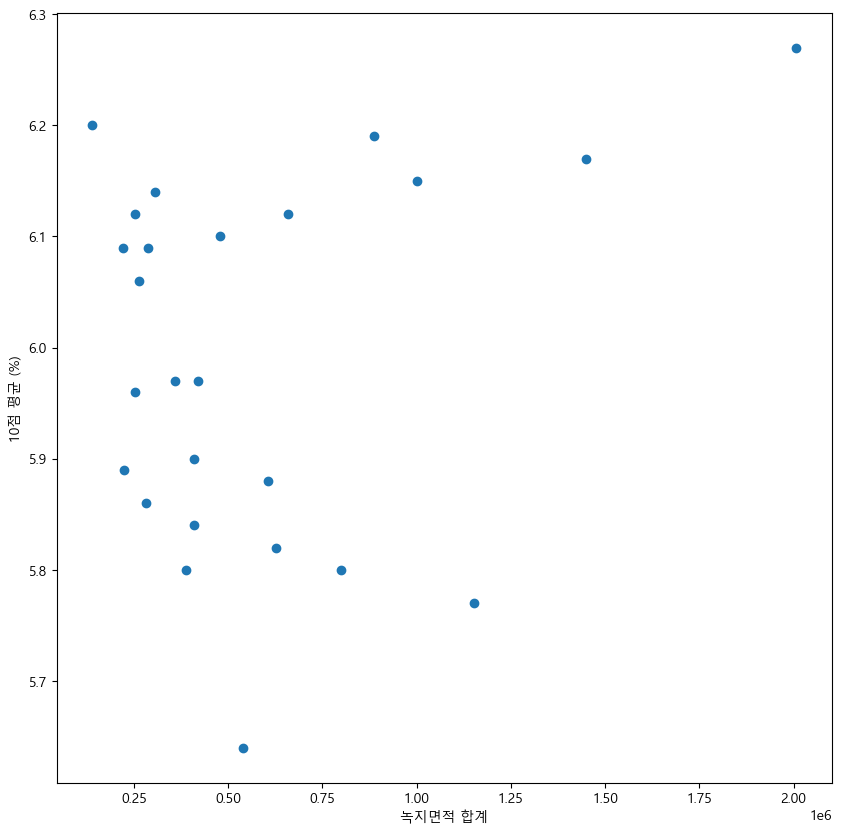

In [16]:
# draw graph for each gu

# Path: greenary.ipynb
# draw graph for each gu
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 10))
plt.scatter(gu_greenary_area['합계'], gu_satisfy['10점 평균 (%)'])
plt.xlabel('녹지면적 합계')
plt.ylabel('10점 평균 (%)')

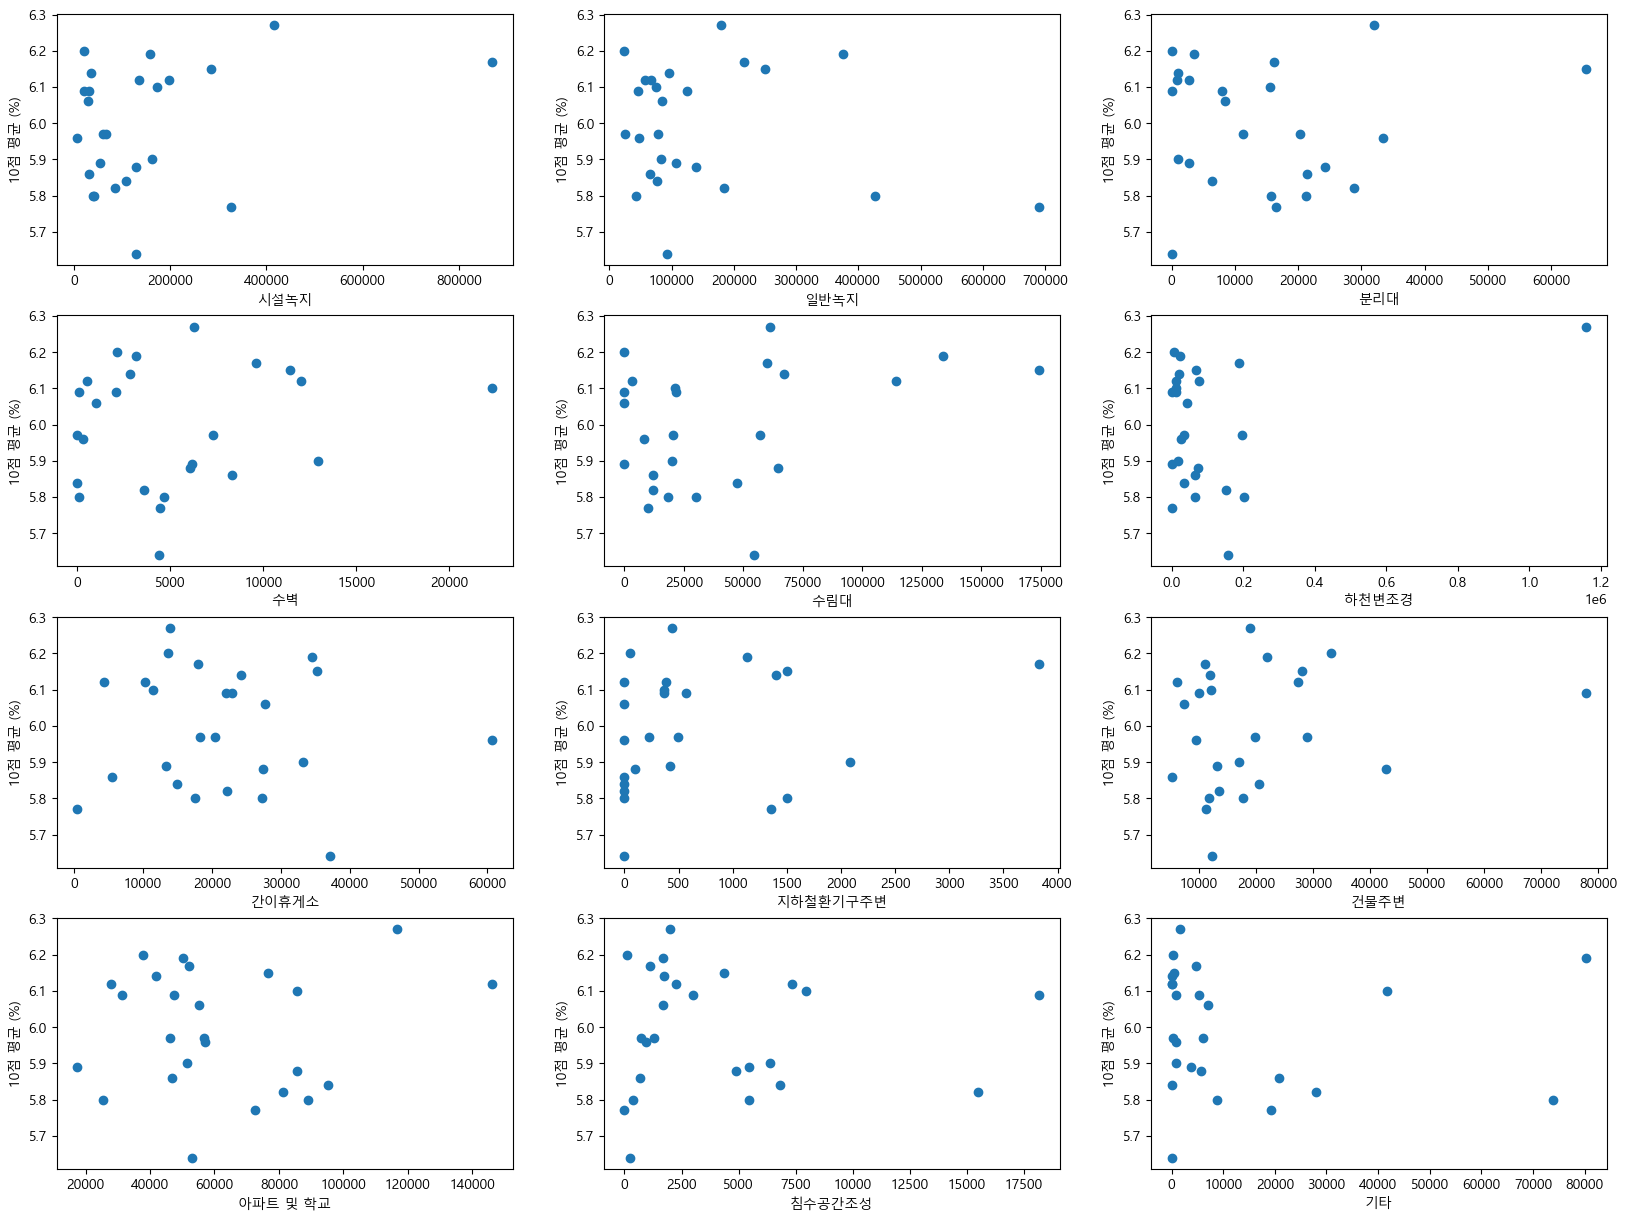

In [17]:
# draw for each col in gu_greenary_area
plt.figure(figsize=(20, 15))
for i, col in enumerate(gu_greenary_area.columns[1:]):
    plt.subplot(4, 3, i+1)
    plt.scatter(gu_greenary_area[col], gu_satisfy['10점 평균 (%)'])
    plt.xlabel(col)
    plt.ylabel('10점 평균 (%)')

Text(0, 0.5, '10점 평균 (%)')

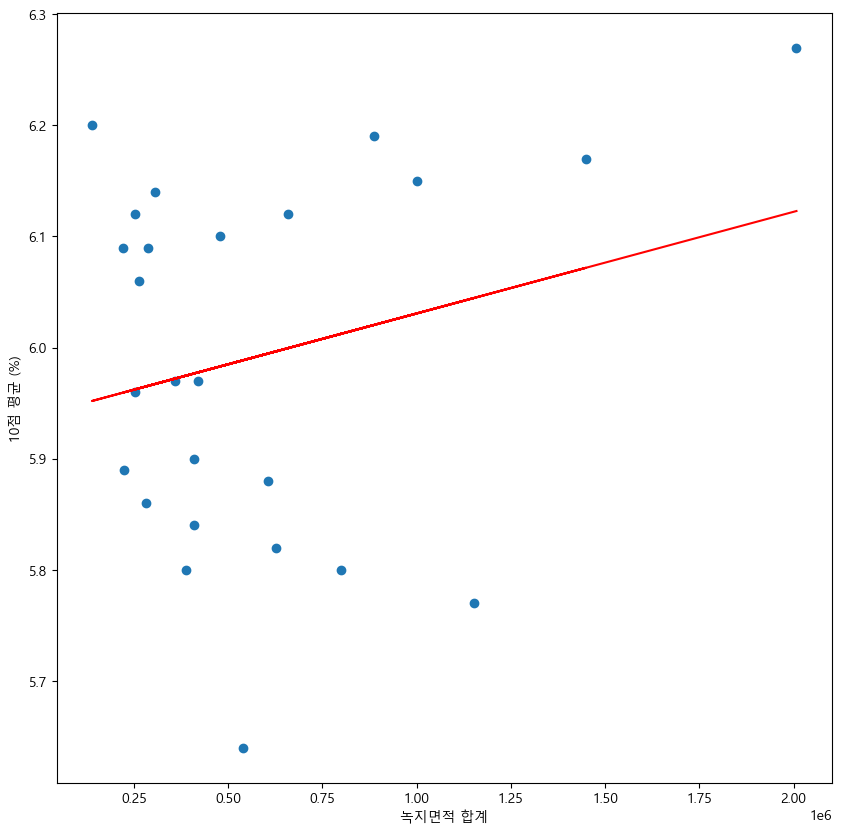

In [19]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gu_greenary_area['합계'].values.reshape(-1, 1)
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('녹지면적 합계')
plt.ylabel('10점 평균 (%)')

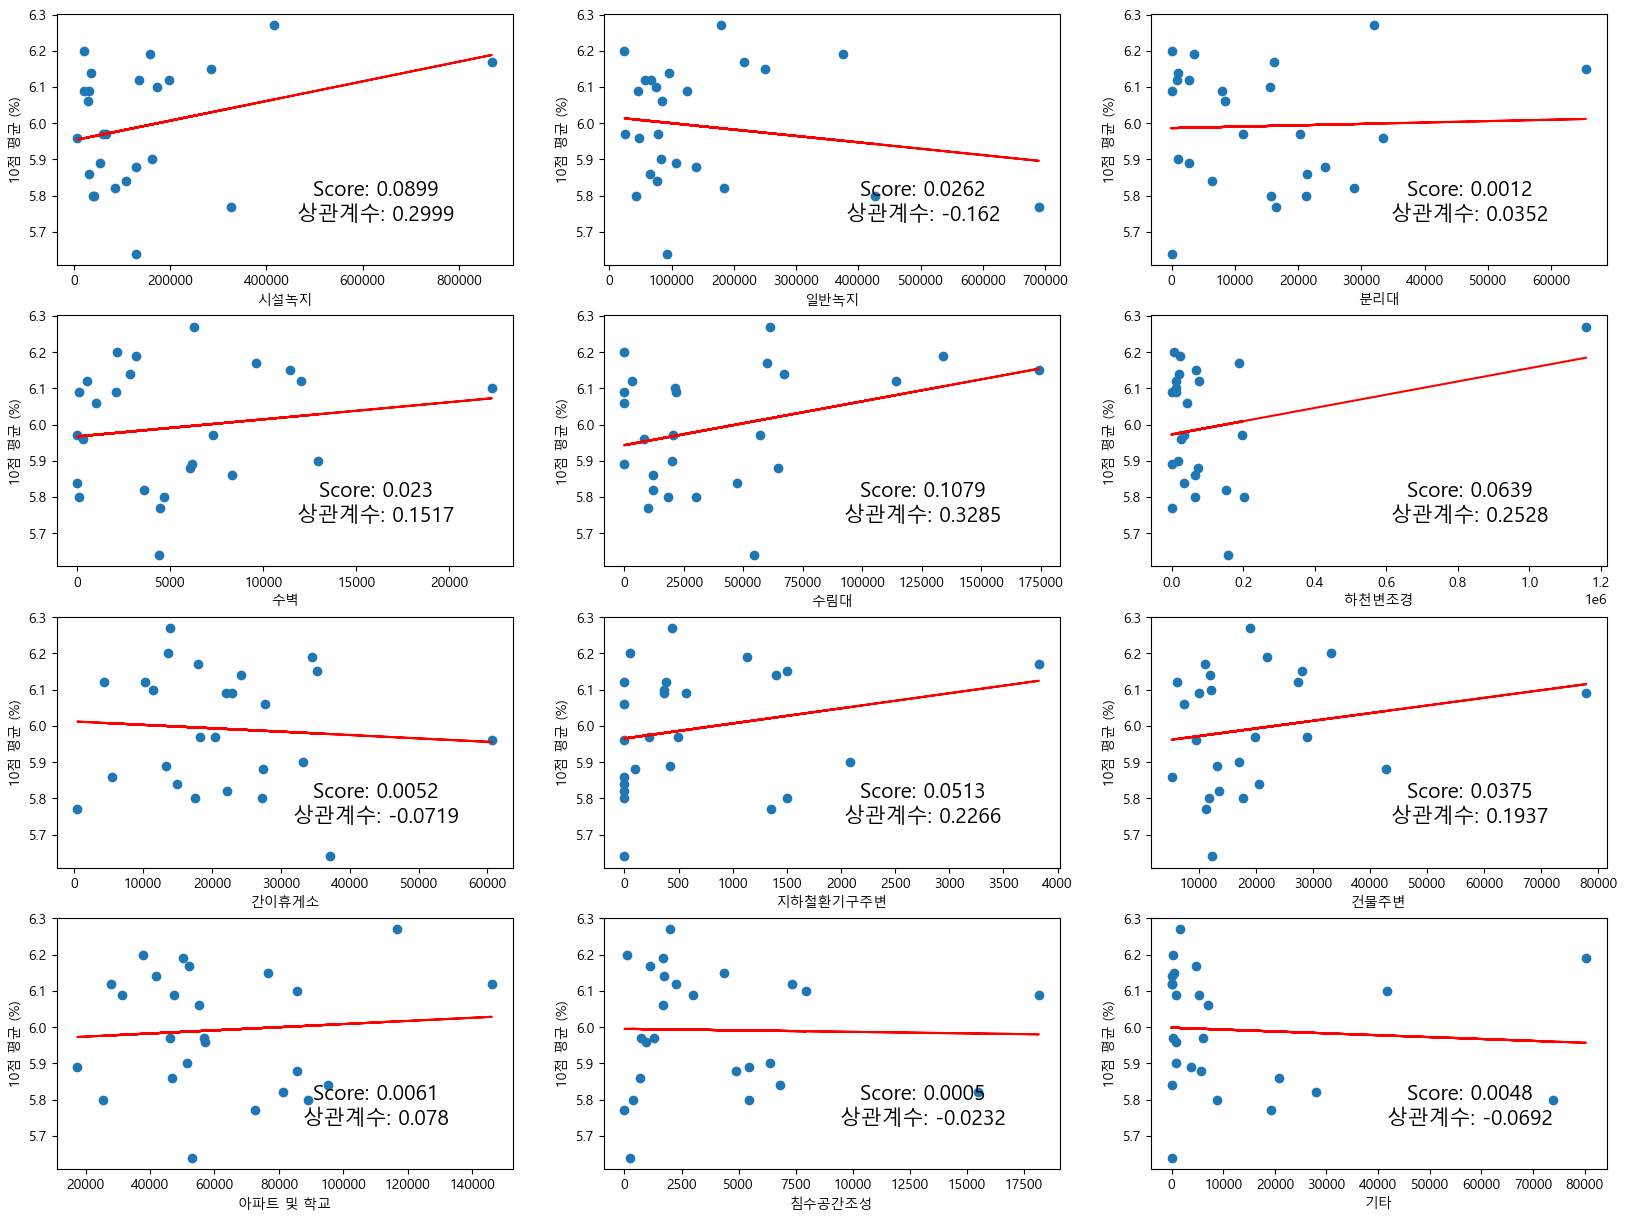

In [ ]:
# linear regression for each col
plt.figure(figsize=(20, 15))

for i, col in enumerate(gu_greenary_area.columns[1:]):
    X = gu_greenary_area[col].values.reshape(-1, 1)
    y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

    # train model
    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_pred = model.predict(X)

    # draw graph
    plt.subplot(4, 3, i+1)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(col)
    plt.ylabel('10점 평균 (%)')

    # plt.text(0.7, 0.3, f"Score: {round(model.score(X, y), 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    x = gu_greenary_area[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    plt.text(0.7, 0.2, f"상관계수: {round(corr[0,1], 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

Text(0, 0.5, '예측값')

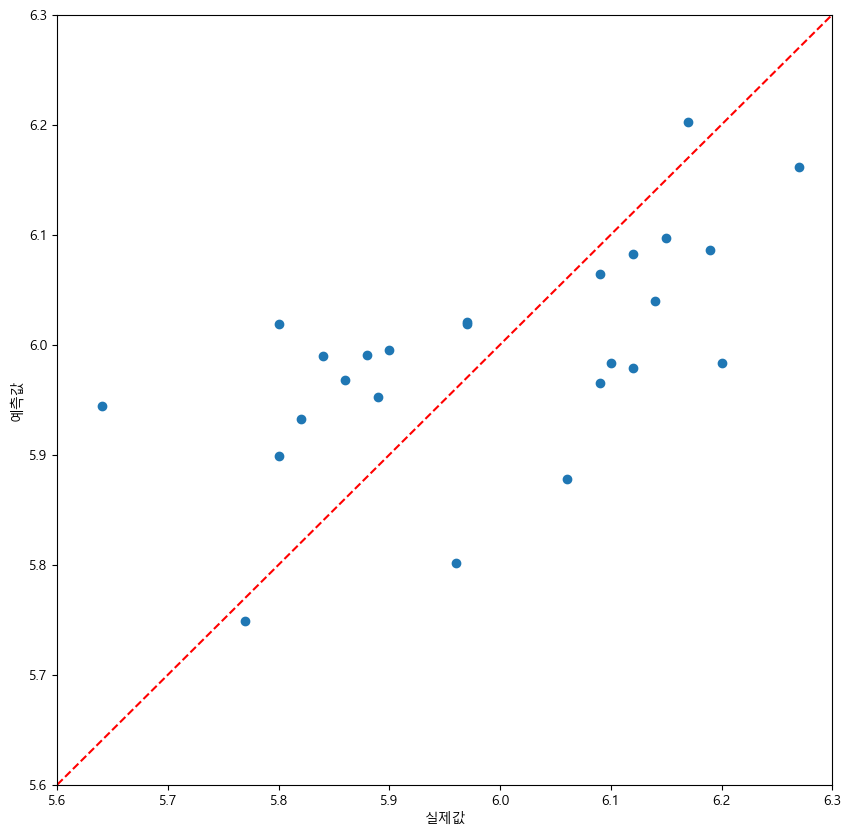

In [23]:
# multiple linear regression

X = gu_greenary_area.iloc[:, 1:]
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred)
plt.plot([5.6, 6.3], [5.6, 6.3], color='red', linestyle='--')
plt.xlim(5.6, 6.3)
plt.ylim(5.6, 6.3)
plt.xlabel('실제값')
plt.ylabel('예측값')
